In [27]:
#Importing all the required libraries
import pandas as pd
import sklearn as sk
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# 1. Dataset 
   Dataset creation using Unity in 3D VR scenes.             
   We used 8 images (2emotions,(4,4)->(happiness,neutral/sad)),          
   We asked 6 participants to look into the scenes to identify the attention points.
   From this experiment, we got 1000 sets of data samples including the attention points.             
   we are going to use 800 samples as training and validation data and 200 as test data.           
   The number of features are 33 which includes 3 target features.

In [28]:
#reading csv files for train and test data
file=pd.read_csv('train_data.csv')
testfile=pd.read_csv('test_data.csv')

In [29]:
features = ['object1position_x','object1position_y','object1position_z','object1scaling_x','object1scaling_y','object1scaling_z','object2position_x','object2position_y','object2position_z','object2scaling_x','object2scaling_y','object2scaling_z','cameraposition_x','cameraposition_y','cameraposition_z','camerascaling_x','camerascaling_y','camerascaling_z','wallposition_x','wallposition_y','wallposition_z','wallscaling_x','wallscaling_y','wallscaling_z','planeposition_x','planeposition_y','planeposition_z','planescaling_x','planescaling_y','planescaling_z']
outputlabels=['attentionposition_x','attentionposition_y','attentionposition_z']


## 2.Exploratory data analysis (EDA) for the dataset to visualize the data


In [30]:
#how many datapoints and features in dataset
print(file.shape)
print(testfile.shape)

(800, 33)
(200, 33)


In [31]:
#what are the columns in the dataset
print(file.columns)

Index(['object1position_x', 'object1position_y', 'object1position_z',
       'object1scaling_x', 'object1scaling_y', 'object1scaling_z',
       'object2position_x', 'object2position_y', 'object2position_z',
       'object2scaling_x', 'object2scaling_y', 'object2scaling_z',
       'cameraposition_x', 'cameraposition_y', 'cameraposition_z',
       'camerascaling_x', 'camerascaling_y', 'camerascaling_z',
       'wallposition_x', 'wallposition_y', 'wallposition_z', 'wallscaling_x',
       'wallscaling_y', 'wallscaling_z', 'planeposition_x', 'planeposition_y',
       'planeposition_z', 'planescaling_x', 'planescaling_y', 'planescaling_z',
       'attentionposition_x', 'attentionposition_y', 'attentionposition_z'],
      dtype='object')


In [32]:
#display first few rows of the dataset
print(file.head(3))

   object1position_x  object1position_y  object1position_z  object1scaling_x  \
0                6.0                2.7               -0.2               150   
1               -9.2                1.8               -0.4               150   
2                3.1                3.2               -0.2               150   

   object1scaling_y  object1scaling_z  object2position_x  object2position_y  \
0               150               150               -5.5                2.5   
1               150               150                0.0                3.5   
2               150               150                7.4                2.7   

   object2position_z  object2scaling_x  ...  wallscaling_z  planeposition_x  \
0               -0.4               150  ...              1            -2.51   
1               -0.2               150  ...              1            -2.51   
2               -0.4               150  ...              1            -2.51   

   planeposition_y  planeposition_z  planesca

### From the first few datapoints we can see random scaling in the dataset.So we need to normalize the data before giving it to the model.

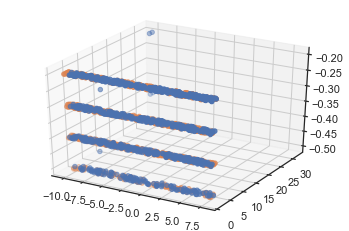

In [33]:
#visualizing object1 and object2 positions in 3D
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = file['object1position_z']
xdata = file['object1position_x']
ydata = file['object1position_y']
z = file['object2position_z']
x = file['object2position_x']
y = file['object2position_y']
ax.scatter3D(xdata, ydata, zdata,cmap='Greens');
ax.scatter3D(x, y, z,cmap='Oranges');

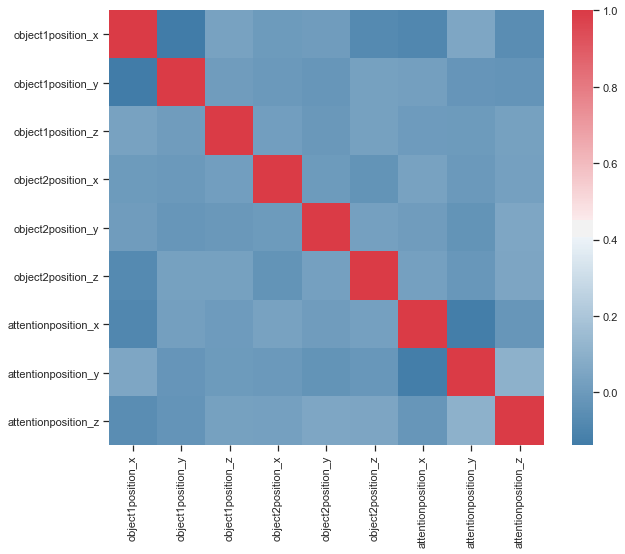

In [34]:
#correlation matrix 
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
la=['object1position_x','object1position_y','object1position_z','object2position_x','object2position_y','object2position_z','attentionposition_x','attentionposition_y','attentionposition_z']
input=file[la]
corr = input.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

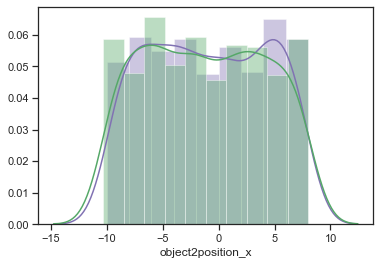

In [35]:
ax = sns.distplot(file['object1position_x'], color = 'm')
ax= sns.distplot(file['object2position_x'],color = 'g')

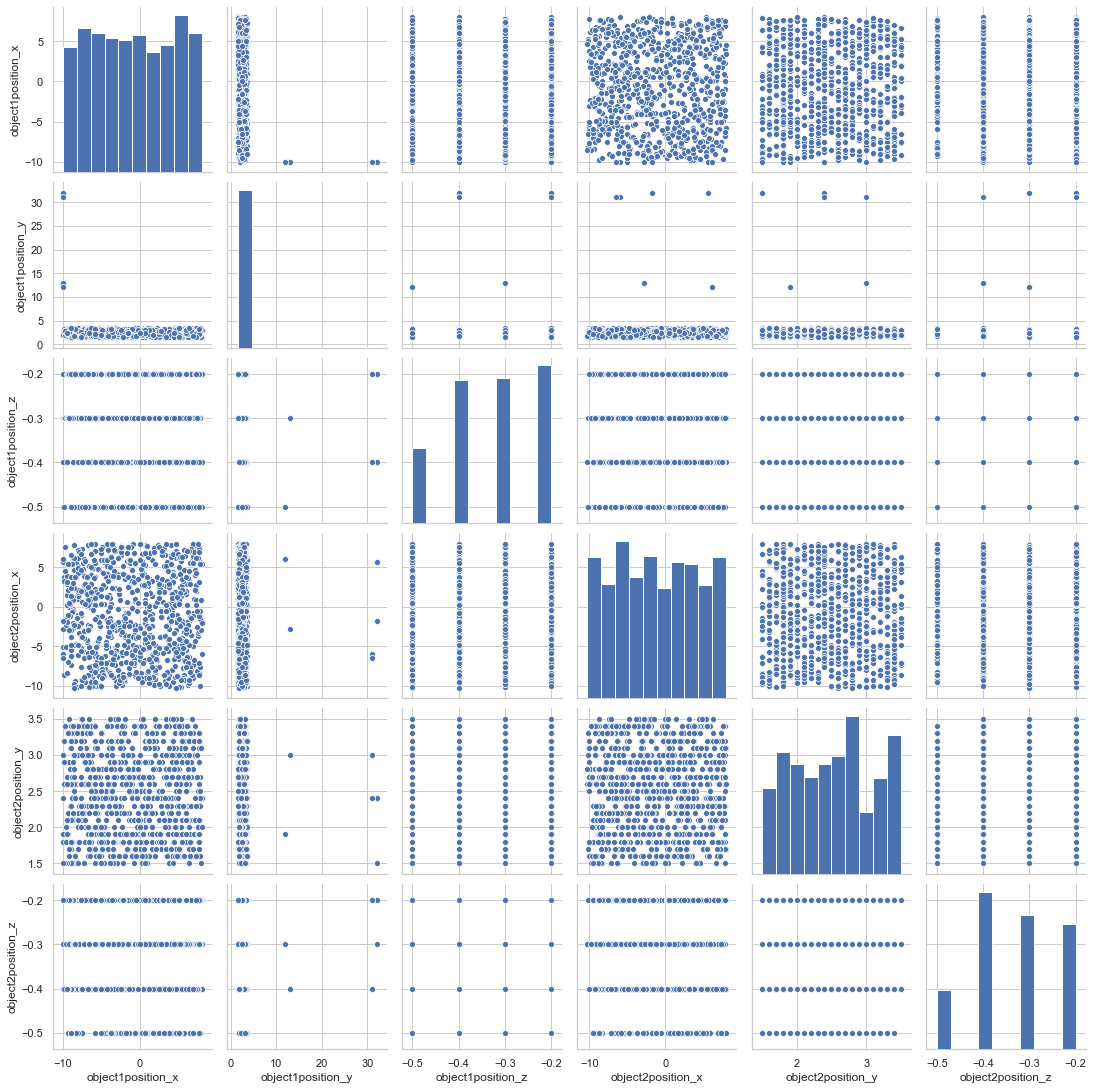

In [36]:
plt.close();
sns.set_style("whitegrid");
la=['object1position_x','object1position_y','object1position_z','object2position_x','object2position_y','object2position_z']
out1=['attentionposition_x','attentionposition_y','attentionposition_z']
out=file[out1]
sns.pairplot(file[la]);
sns.set(style="ticks", color_codes=True)
plt.show()

In [37]:
# MinMaxScalers for features and output labels
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and Transform the data using MinMaxScaler

file[features] = pd.DataFrame(scaler_x.fit_transform(file[features]))
file[outputlabels] = pd.DataFrame(scaler_y.fit_transform(file[outputlabels]))

X_test= pd.DataFrame(scaler_x.fit_transform(testfile[features]))
y_test= pd.DataFrame(scaler_y.fit_transform(testfile[outputlabels]))



X_train, X_valid, y_train, y_valid = train_test_split(file[features], file[outputlabels], test_size=0.3, random_state=42)    # preparing the validation set


model = Sequential()
model.add(Dense(30, input_dim=30, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='tanh'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                

In [38]:
# compile the keras model
opt=Adam(learning_rate=0.0001, beta_1=0.88, beta_2=0.911, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])


# fit the keras model on the dataset
history=model.fit(X_train, y_train, epochs=350, validation_data=(X_valid, y_valid))


Train on 560 samples, validate on 240 samples
Epoch 1/350
560/560 [==============================] - 1s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.3881 - val_mse: 0.3881
Epoch 2/350
560/560 [==============================] - 0s 96us/step - loss: 0.5383 - mse: 0.5383 - val_loss: 0.3323 - val_mse: 0.3323
Epoch 3/350
560/560 [==============================] - 0s 80us/step - loss: 0.4727 - mse: 0.4727 - val_loss: 0.2828 - val_mse: 0.2828
Epoch 4/350
560/560 [==============================] - 0s 83us/step - loss: 0.4631 - mse: 0.4631 - val_loss: 0.2404 - val_mse: 0.2404
Epoch 5/350
560/560 [==============================] - 0s 81us/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.2040 - val_mse: 0.2040
Epoch 6/350
560/560 [==============================] - 0s 82us/step - loss: 0.4392 - mse: 0.4392 - val_loss: 0.1719 - val_mse: 0.1719
Epoch 7/350
560/560 [==============================] - 0s 78us/step - loss: 0.4135 - mse: 0.4135 - val_loss: 0.1460 - val_mse: 0.1460
Epoch 8/350
560/5

Training MSE 0.15266430458286548
TEST MSE 0.1991365621598725
Predicted Value
  [[0.44294554 0.36647603 0.47261837]
 [0.43838504 0.3739449  0.5632455 ]
 [0.45690945 0.38173005 0.628006  ]
 [0.46157923 0.3748986  0.5497929 ]
 [0.48112282 0.3888879  0.66811764]
 [0.4556488  0.37100148 0.52206   ]
 [0.45711434 0.38639736 0.6690817 ]
 [0.45319337 0.37219685 0.5365849 ]
 [0.47552103 0.37628174 0.5572189 ]
 [0.46734262 0.39138666 0.7001242 ]
 [0.45673573 0.37159654 0.51742685]
 [0.45131677 0.3802002  0.61973524]
 [0.4674843  0.37127718 0.49946412]
 [0.44087777 0.358931   0.38930973]
 [0.4456972  0.3631881  0.42786324]
 [0.4512618  0.37269288 0.54973227]
 [0.4745102  0.39198497 0.6934459 ]
 [0.45639396 0.36056533 0.39604378]
 [0.44173986 0.36777848 0.5042347 ]
 [0.42552426 0.3533001  0.34377697]
 [0.46846092 0.37377152 0.5378312 ]
 [0.45450053 0.37630308 0.5737186 ]
 [0.477256   0.38453242 0.6278232 ]
 [0.4547722  0.37695372 0.5815921 ]
 [0.4630652  0.3792142  0.59812313]
 [0.4508237  0.362033

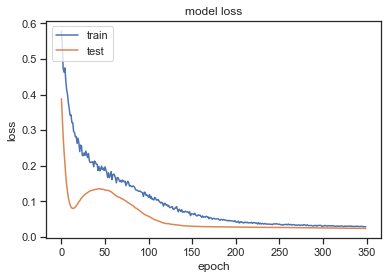

<Figure size 432x288 with 0 Axes>

In [39]:
# evaluate the keras model

pred_train= model.predict(X_train)
print('Training MSE',np.sqrt(mean_squared_error(y_train,pred_train)))

predicted_value = model.predict(X_test)
print('TEST MSE',np.sqrt(mean_squared_error(y_test,predicted_value))) 
#predicted_scaler = MinMaxScaler()
#scaler.fit(predicted_value)
print("Predicted Value\n ",predicted_value,"\n Denormalized Value\n ", scaler_y.inverse_transform(predicted_value).round(1))
#print(output[0][0],output[0][1],output[0][2])
#print(predicted)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('loss')
